In [ ]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb


import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## **Data Loading & Investigation**

In [ ]:
accidents_df = pd.read_csv('/content/global_traffic_accidents.csv')

In [ ]:
accidents_df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [ ]:
accidents_df.shape

(10000, 11)

In [ ]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [ ]:
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'])

In [ ]:
accidents_df['Year'] = accidents_df['Date'].dt.year

In [ ]:
accidents_df['Month'] = accidents_df['Date'].dt.month

In [ ]:
type(accidents_df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
accidents_df['Time'] = accidents_df['Time'].astype(str).str.strip()
accidents_df['Time'] = pd.to_datetime(accidents_df['Time'], format='%H:%M', errors='coerce').dt.time

In [ ]:
type(accidents_df['Time'].iloc[0])

datetime.time

In [ ]:
accidents_df['City'] = accidents_df['Location'].map(lambda x: x.split(',')[0])

In [ ]:
accidents_df['Country'] = accidents_df['Location'].map(lambda x: x.split(',')[1])

In [ ]:
print('Unique Countries:', accidents_df['Country'].unique())

Unique Countries: [' India' ' Brazil' ' Australia' ' Japan' ' China' ' France' ' UK'
 ' Canada' ' Germany' ' USA']


In [ ]:
print('Unique Cities:', accidents_df['City'].unique())

Unique Cities: ['Mumbai' 'São Paulo' 'Sydney' 'Tokyo' 'Beijing' 'Paris' 'London'
 'Toronto' 'Berlin' 'New York']


In [ ]:
accidents_df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Year,Month,City,Country
0,b0dd6f57,2023-04-19,06:39:00,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,2023,4,Mumbai,India
1,debfad09,2023-01-17,02:47:00,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,2023,1,São Paulo,Brazil
2,6d69aa36,2024-04-09,02:55:00,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,2024,4,Sydney,Australia
3,425bb1f0,2023-10-10,11:23:00,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,2023,10,Tokyo,Japan
4,90d5cf62,2023-01-02,12:07:00,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,2023,1,Beijing,China


In [ ]:
accidents_df.drop(columns=['Location'], inplace=True)

In [ ]:
accidents_df.head()

,Accident ID,Date,Time,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Year,Month,City,Country
0,b0dd6f57,2023-04-19,06:39:00,13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,2023,4,Mumbai,India
1,debfad09,2023-01-17,02:47:00,-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,2023,1,São Paulo,Brazil
2,6d69aa36,2024-04-09,02:55:00,33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,2024,4,Sydney,Australia
3,425bb1f0,2023-10-10,11:23:00,-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,2023,10,Tokyo,Japan
4,90d5cf62,2023-01-02,12:07:00,41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,2023,1,Beijing,China


In [ ]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accident ID        10000 non-null  object        
 1   Date               10000 non-null  datetime64[ns]
 2   Time               10000 non-null  object        
 3   Latitude           10000 non-null  float64       
 4   Longitude          10000 non-null  float64       
 5   Weather Condition  10000 non-null  object        
 6   Road Condition     10000 non-null  object        
 7   Vehicles Involved  10000 non-null  int64         
 8   Casualties         10000 non-null  int64         
 9   Cause              10000 non-null  object        
 10  Year               10000 non-null  int32         
 11  Month              10000 non-null  int32         
 12  City               10000 non-null  object        
 13  Country            10000 non-null  object        
dtypes: date

In [ ]:
accidents_df.describe()

,Date,Latitude,Longitude,Vehicles Involved,Casualties,Year,Month
count,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2024-01-01 12:40:53.760000256,-0.543557,0.338573,2.999100,4.98820,2023.500800,6.535600
min,2023-01-01 00:00:00,-89.985688,-179.961984,1.000000,0.00000,2023.000000,1.000000
25%,2023-06-30 00:00:00,-45.426619,-88.231733,2.000000,2.00000,2023.000000,4.000000
50%,2024-01-01 00:00:00,-1.080556,-0.682727,3.000000,5.00000,2024.000000,7.000000
75%,2024-07-03 00:00:00,44.137309,89.973059,4.000000,8.00000,2024.000000,9.000000
max,2024-12-31 00:00:00,89.990081,179.981695,5.000000,10.00000,2024.000000,12.000000
std,NaN,51.917928,103.379168,1.408935,3.13015,0.500024,3.437778


## **Exploratory Data Analysis**

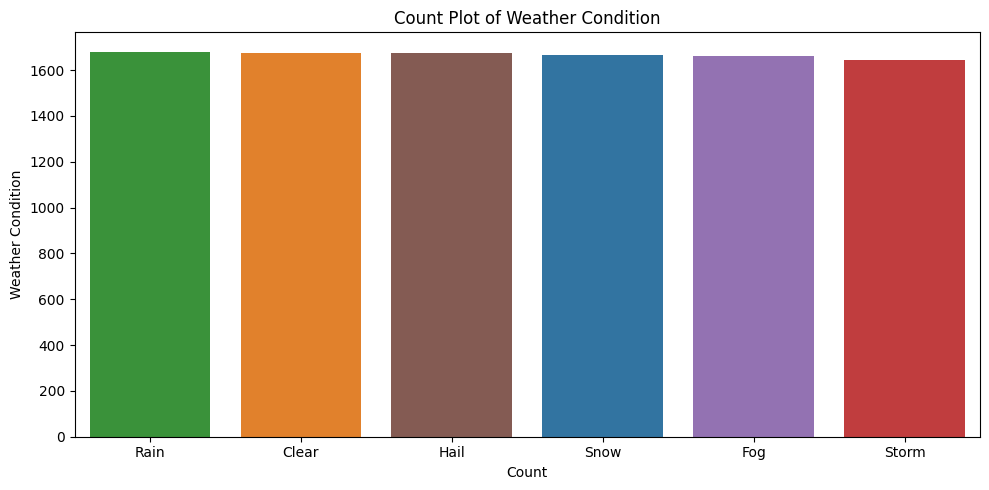

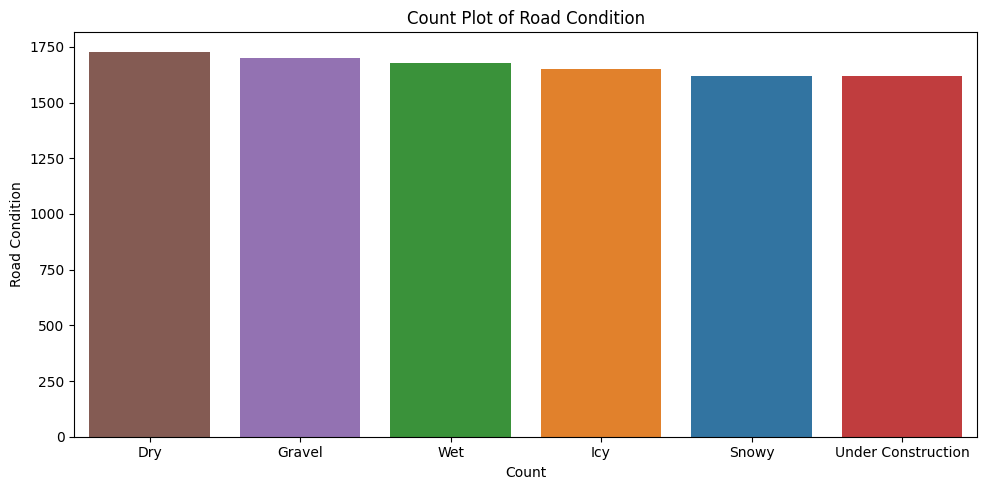

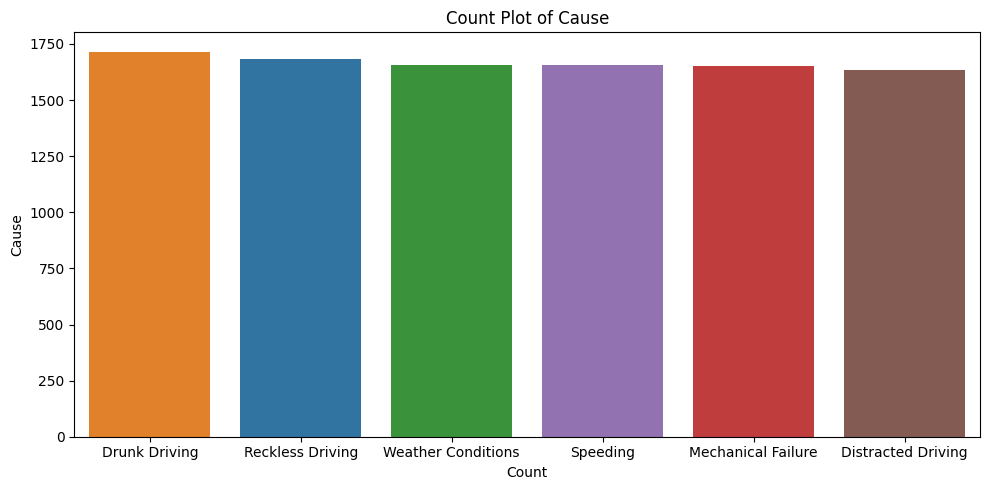

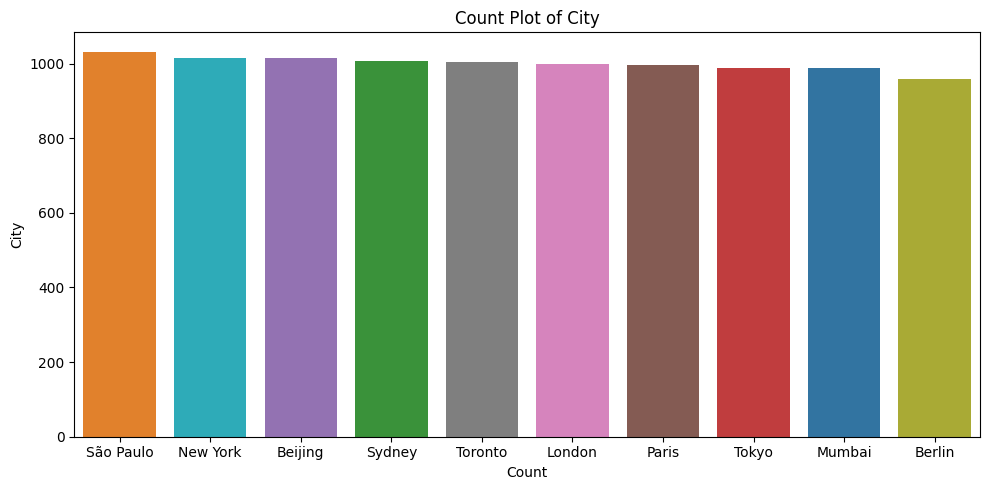

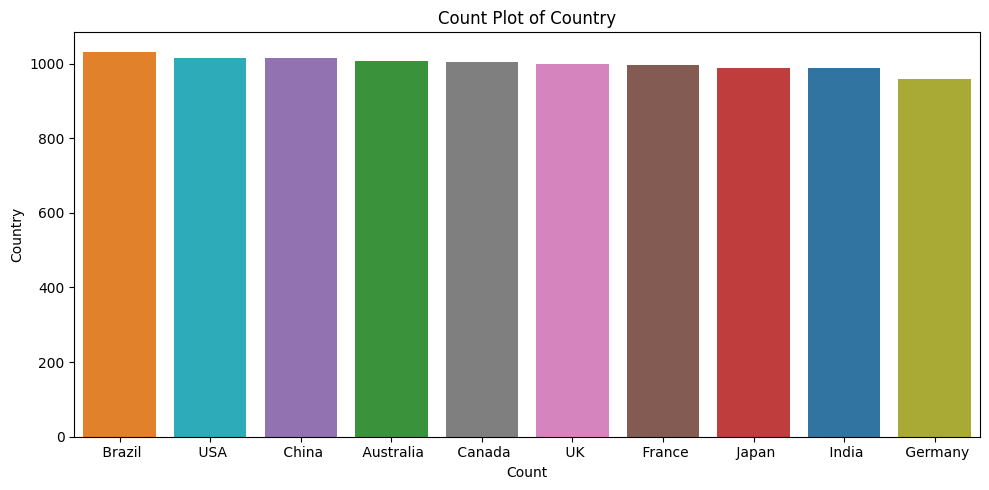

In [ ]:
categorical_columns = [
                        'Weather Condition',
                        'Road Condition',
                        'Cause',
                        'City',
                        'Country'
                      ]


for column in categorical_columns:

    plt.figure(figsize=(10, 5))

    sns.countplot(data=accidents_df, x=column, order=accidents_df[column].value_counts().index, hue= column, palette='tab10')

    plt.title(f'Count Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

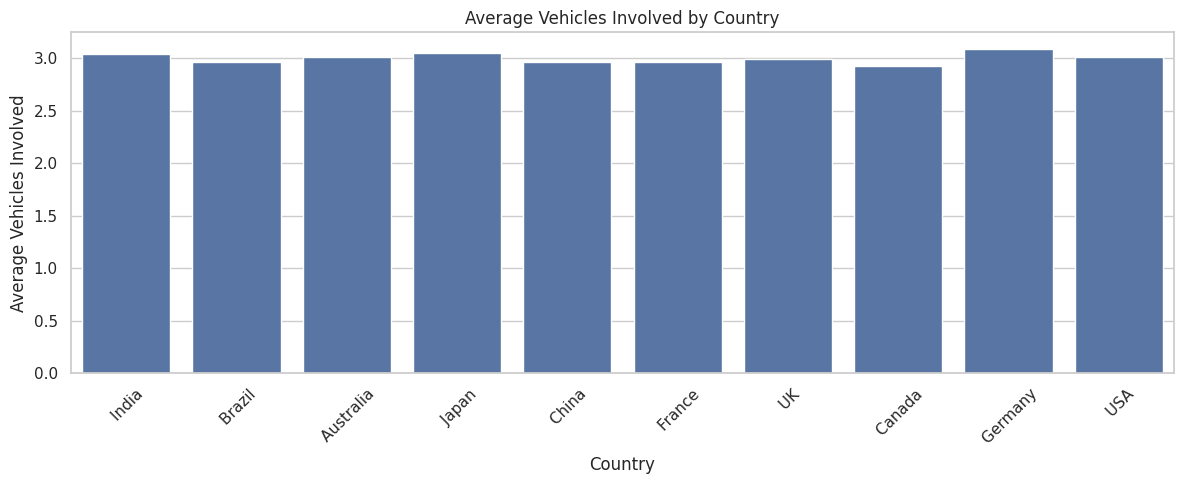

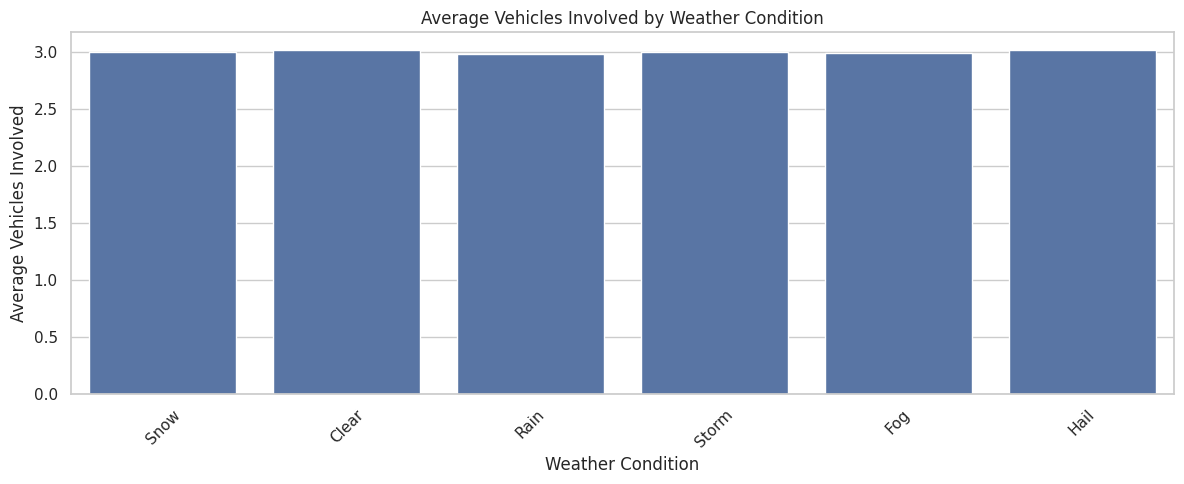

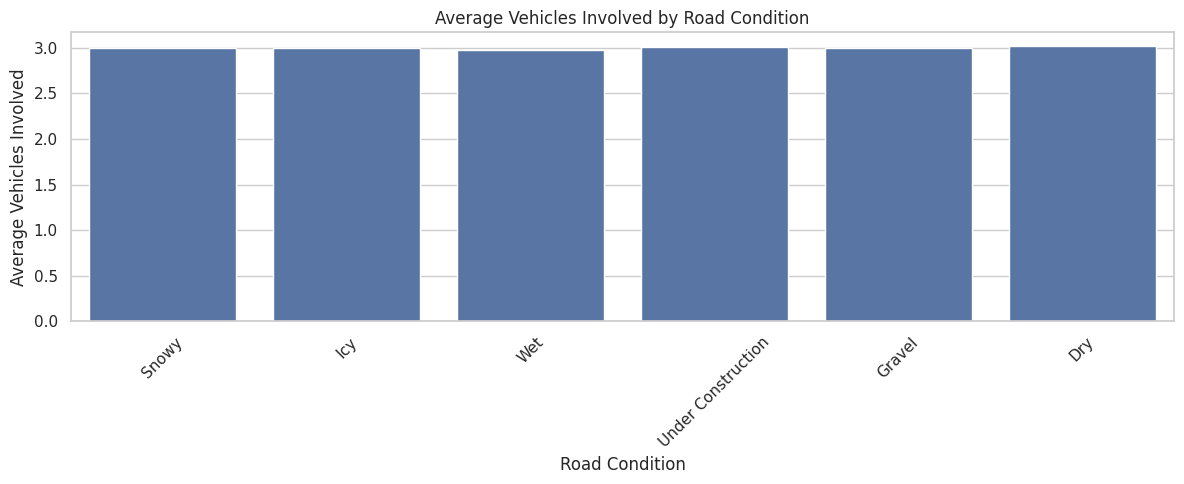

In [ ]:
conditions_of_interset = ['Country', 'Weather Condition', 'Road Condition']


# Set plot style
sns.set(style="whitegrid")


for col in conditions_of_interset:

    # Plot average Vehicles Involved
    plt.figure(figsize=(12, 5))

    sns.barplot(data=accidents_df, x=col, y='Vehicles Involved', estimator='mean', errorbar=None)

    plt.title(f'Average Vehicles Involved by {col}')
    plt.ylabel('Average Vehicles Involved')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

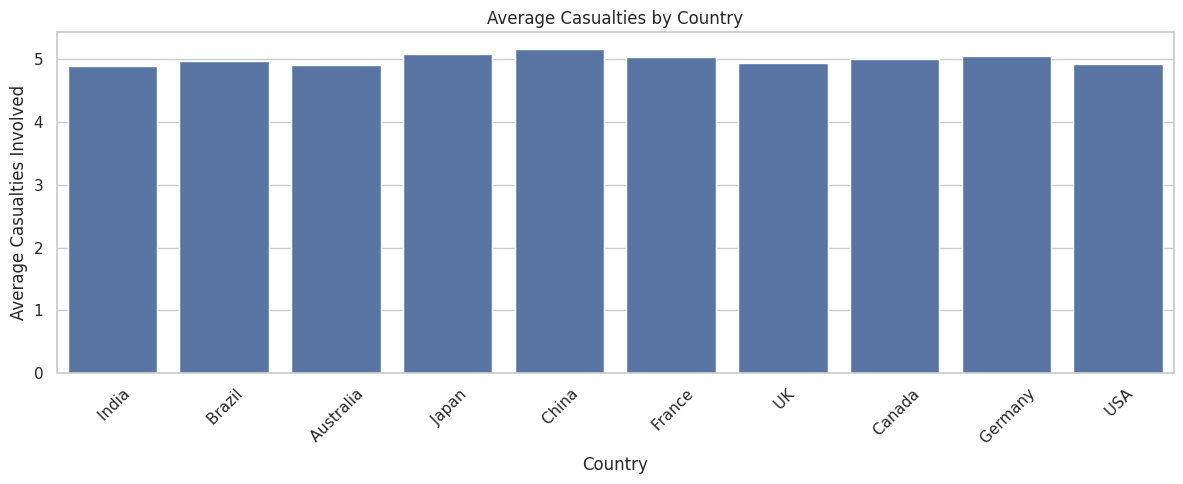

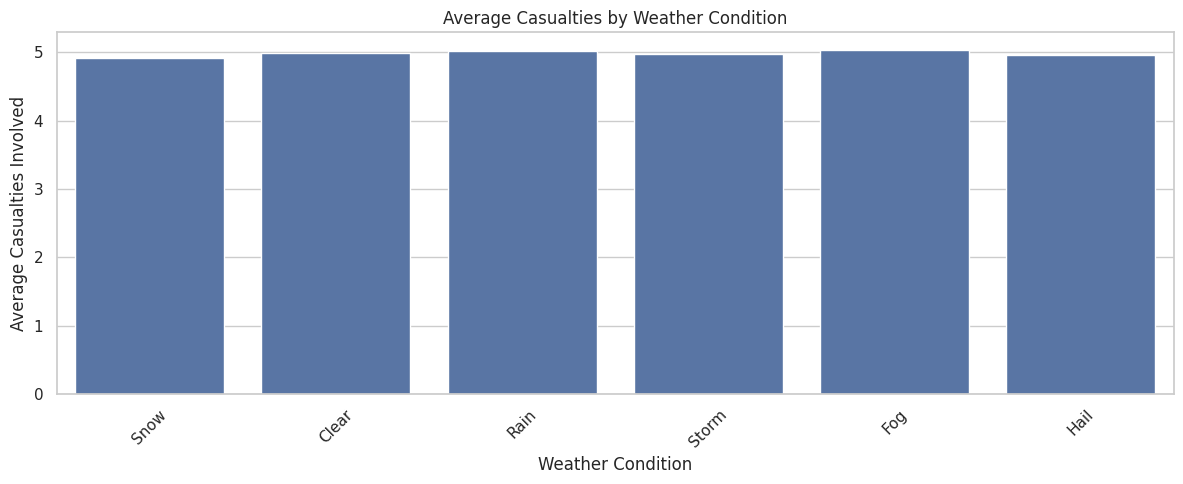

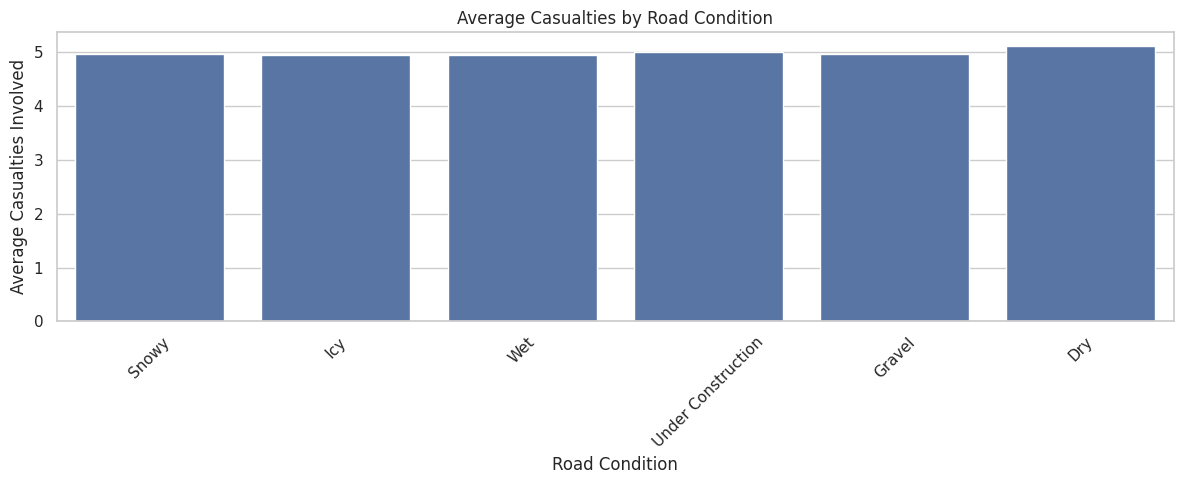

In [ ]:
conditions_of_interset = ['Country', 'Weather Condition', 'Road Condition']


# Set plot style
sns.set(style="whitegrid")


for col in conditions_of_interset:

    # Plot average Casualties
    plt.figure(figsize=(12, 5))

    sns.barplot(data=accidents_df, x=col, y='Casualties', estimator='mean', errorbar=None)

    plt.title(f'Average Casualties by {col}')
    plt.ylabel('Average Casualties Involved')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

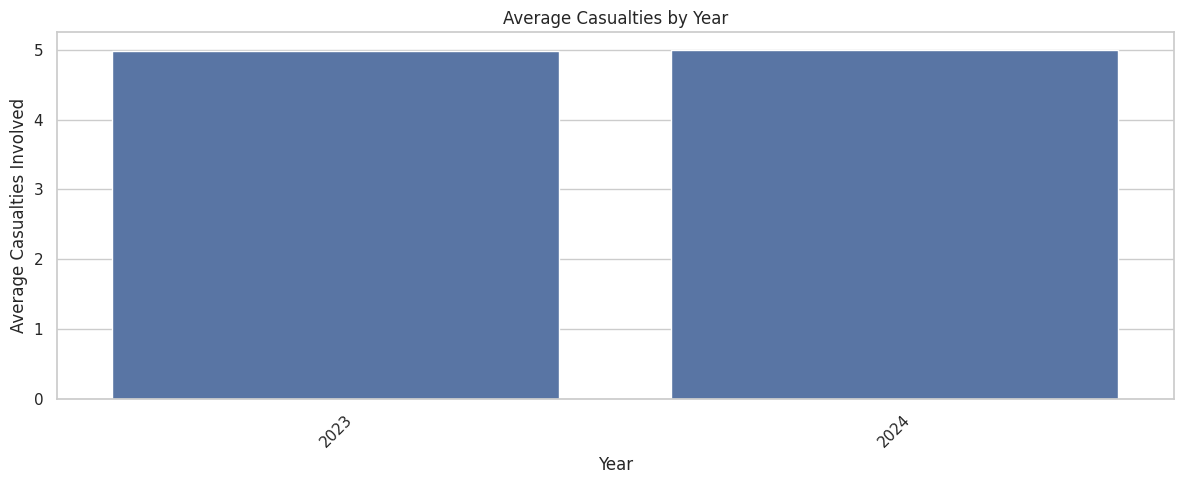

In [ ]:
# Plot Average Casualties by Year
plt.figure(figsize=(12, 5))

sns.barplot(data=accidents_df, x='Year', y='Casualties', estimator='mean', errorbar=None)

plt.title(f'Average Casualties by Year')
plt.ylabel('Average Casualties Involved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

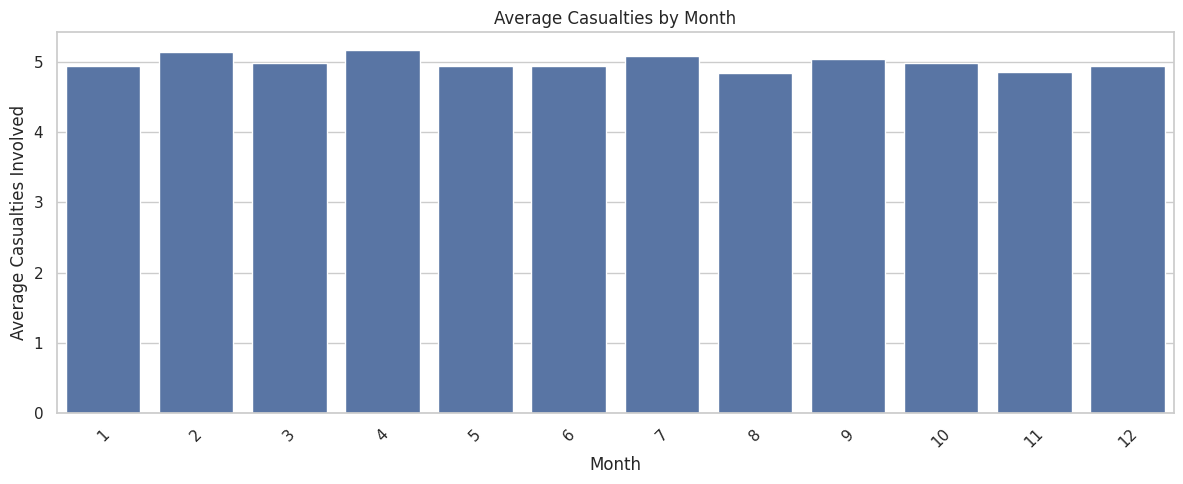

In [ ]:
# Plot Average Casualties by Month
plt.figure(figsize=(12, 5))

sns.barplot(data=accidents_df, x='Month', y='Casualties', estimator='mean', errorbar=None)

plt.title(f'Average Casualties by Month')
plt.ylabel('Average Casualties Involved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

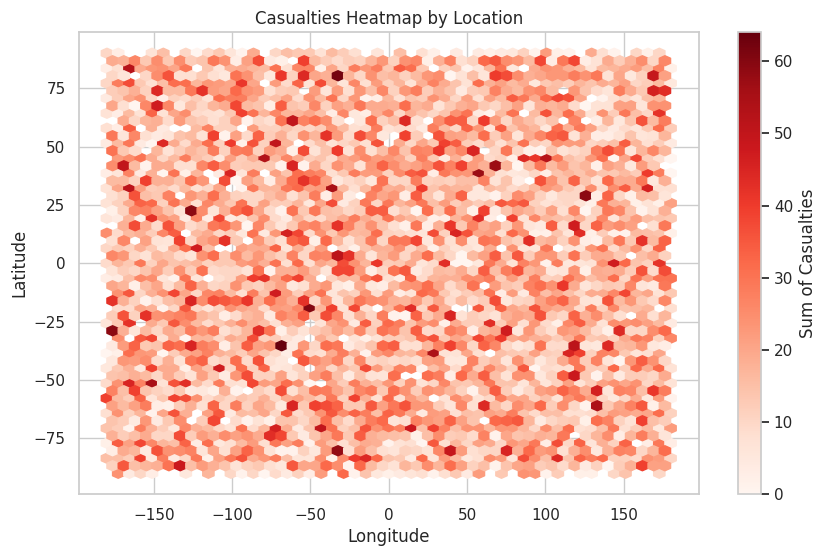

In [ ]:
# Casualties by longitude & latitude group/cluster
plt.figure(figsize=(10, 6))

hb = plt.hexbin(accidents_df['Longitude'], accidents_df['Latitude'],
                C=accidents_df['Casualties'], reduce_C_function=np.sum,
                gridsize=50, cmap='Reds')

plt.colorbar(hb, label='Sum of Casualties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Casualties Heatmap by Location')
plt.show()

<ipython-input-27-803d59a5f38d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_count_by_year.index, y=accidents_count_by_year.values, palette="viridis")


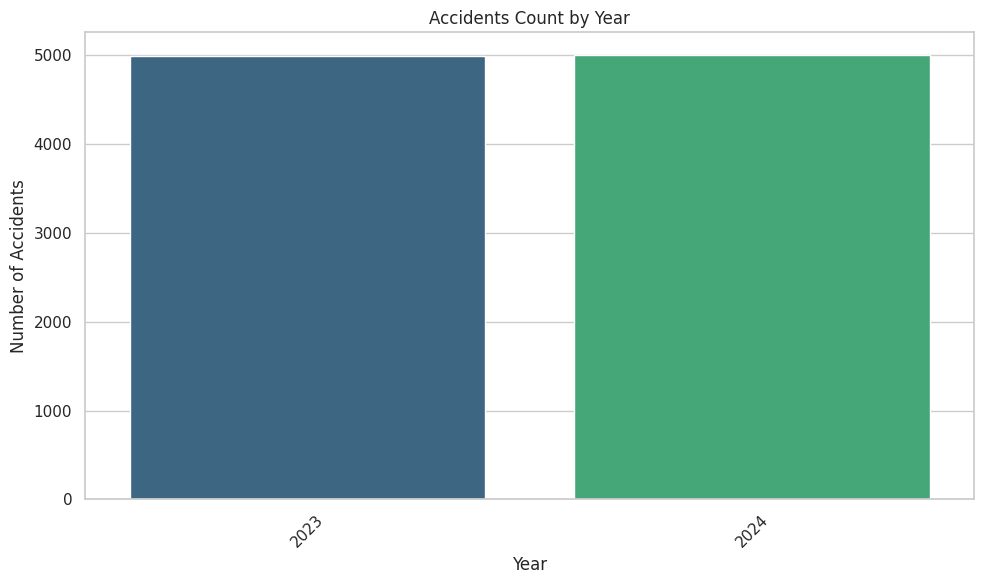

In [ ]:
# Accidents Count by Year
accidents_count_by_year = accidents_df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_count_by_year.index, y=accidents_count_by_year.values, palette="viridis")

plt.title("Accidents Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Forecasting Model**

In [ ]:
def plot_series(x_data, y_data, title, x_label, y_label, labels=[], linestyles=[]):

    """
    Plots multiple time series on the same figure.

    Args:
      x_data : list of array-like
          List containing x-axis data for each series (e.g., list of datetime arrays).

      y_data : list of array-like
          List containing y-axis data for each series (e.g., casualties, counts, etc.).

      title : str
          Title of the plot.

      x_label : str
          Label for the x-axis.

      y_label : str
          Label for the y-axis.

      labels : list of str, optional
          List of labels for each series (for the legend). Default is an empty list.

      linestyles : list of str, optional
          List of line styles for each series (e.g., '-', '--', '-.', ':'). Default is an empty list.

    Returns:
      None
          Displays the plot.
    """

    # Single figure for all lines
    plt.figure(figsize=(12,6))

    # Plot Individual lines
    for x, y, label, line_style in zip(x_data, y_data, labels, linestyles):

        plt.plot(x, y, marker='o', label=label, linestyle=line_style)

    # Set Title & Axes Labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the Plot
    plt.grid(True)
    plt.show()

In [ ]:
def forecast_interval(monthly_counts, n_forecast, last_known):

    """
    Forecasts future monthly accident counts using a trained model and lagged inputs.

    This function uses the last 3 known monthly values to iteratively predict the
    next `n_forecast` months.

    Args:
      monthly_counts : pandas.DataFrame
          The original DataFrame containing historical monthly accident counts.
          Must include a 'YearMonth' column with datetime-like entries.

      n_forecast : int
          The number of future months to forecast.

      last_known : list of float
          A list of the most recent known or predicted values (e.g., accident counts),
          from which the model will generate lag-based forecasts.
          Must contain at least 3 values.

    Returns:
      future_dates : pandas.DatetimeIndex
          A datetime index corresponding to the forecasted months.

      future_predictions : list of float
          List of predicted values for each forecasted month.

    Notes:
    ------
    - This function assumes a global `model` (e.g., an XGBoost regressor) is already trained.
    - The forecast is recursive: predictions are fed back as inputs for future steps.
    - `last_known` is modified in-place by appending the predictions.
    """

    future_predictions = []

    for i in range(n_forecast):

        # Create input features from last 3 months
        x_input = pd.DataFrame([last_known[-1], last_known[-2], last_known[-3]]).T
        x_input.columns = ['lag_1', 'lag_2', 'lag_3']
        x_input = x_input[['lag_1', 'lag_2', 'lag_3']]

        # Predict next month
        y_pred = model.predict(x_input)[0]
        future_predictions.append(y_pred)

        # Append prediction to last_known to roll forward
        last_known.append(y_pred)

    # Build future dates index for plotting
    last_date = monthly_counts['YearMonth'].iloc[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=n_forecast, freq='MS')

    return future_dates, future_predictions

#### **1- Predict Casualties**

In [ ]:
# Date,	Time,	City,	Country,	Latitude,	Longitude,	Weather Condition,	Road Condition,	Vehicles Involved,	Cause,	Casualties

In [ ]:
# Ensure both Date and Time are strings first
accidents_df['Date'] = accidents_df['Date'].astype(str)
accidents_df['Time'] = accidents_df['Time'].astype(str).str.strip()

# Combine Date and Time into a single string, then convert to datetime
accidents_df['DateTime'] = pd.to_datetime(accidents_df['Date'] + ' ' + accidents_df['Time'], errors='coerce')

# Extract date/time features
accidents_df['Year'] = accidents_df['DateTime'].dt.year
accidents_df['Month'] = accidents_df['DateTime'].dt.month
accidents_df['Day'] = accidents_df['DateTime'].dt.day
accidents_df['DayOfWeek'] = accidents_df['DateTime'].dt.dayofweek
accidents_df['Hour'] = accidents_df['DateTime'].dt.hour

In [ ]:
# Select relevant features
categorical_cols = ['City', 'Country', 'Weather Condition', 'Road Condition', 'Cause']
numerical_cols = ['Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Latitude', 'Longitude', 'Vehicles Involved']

# One-hot encode categorical features
accidents_encoded = pd.get_dummies(accidents_df[categorical_cols], drop_first=True)

# Combine with numerical features
X = pd.concat([accidents_df[numerical_cols], accidents_encoded], axis=1)
y = accidents_df['Casualties']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
                          n_estimators=200,
                          learning_rate=0.01,
                          max_depth=5,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          random_state=42
                        )

model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 3.16


In [ ]:
# Save the trained model
joblib.dump(model, 'xgboost_casualties_model.pkl')

['xgboost_casualties_model.pkl']

In [ ]:
# Save Column order used in training
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'xgboost_feature_columns.pkl')

['xgboost_feature_columns.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('xgboost_casualties_model.pkl')

In [ ]:
# Example dummy data
dummy_data = pd.DataFrame([{
                            'Year': 2025,
                            'Month': 6,
                            'Day': 5,
                            'DayOfWeek': 3,         # Wednesday
                            'Hour': 14,
                            'Latitude': 40.7128,
                            'Longitude': -74.0060,
                            'Vehicles Involved': 3,

                            # City (only one should be 1, rest 0)
                            'City_Berlin': 0,
                            'City_London': 0,
                            'City_Mumbai': 0,
                            'City_New York': 1,
                            'City_Paris': 0,
                            'City_Sydney': 0,
                            'City_São Paulo': 0,
                            'City_Tokyo': 0,
                            'City_Toronto': 0,

                            # Country
                            'Country_ Brazil': 0,
                            'Country_ Canada': 0,
                            'Country_ China': 0,
                            'Country_ France': 0,
                            'Country_ Germany': 0,
                            'Country_ India': 0,
                            'Country_ Japan': 0,
                            'Country_ UK': 0,
                            'Country_ USA': 1,

                            # Weather
                            'Weather Condition_Fog': 0,
                            'Weather Condition_Hail': 0,
                            'Weather Condition_Rain': 0,
                            'Weather Condition_Snow': 0,
                            'Weather Condition_Storm': 1,

                            # Road Condition
                            'Road Condition_Gravel': 0,
                            'Road Condition_Icy': 0,
                            'Road Condition_Snowy': 0,
                            'Road Condition_Under Construction': 0,
                            'Road Condition_Wet': 1,

                            # Cause
                            'Cause_Drunk Driving': 0,
                            'Cause_Mechanical Failure': 0,
                            'Cause_Reckless Driving': 1,
                            'Cause_Speeding': 0,
                            'Cause_Weather Conditions': 0,
                        }])

# Ensure all columns match model input exactly
feature_columns = joblib.load(open('xgboost_feature_columns.pkl', 'rb'))
dummy_data = dummy_data.reindex(columns=feature_columns, fill_value=0)

# Predict casualties
predicted_casualties = loaded_model.predict(dummy_data)
print(f"Predicted Casualties: {predicted_casualties[0]:.2f}")

Predicted Casualties: 5.00


#### **2- Forecast Casualties (Monthly Interval)**

In [ ]:
#
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'])
accidents_df['YearMonth'] = accidents_df['Date'].dt.to_period('M')

# Group by YearMonth and sum casualties
monthly_counts = accidents_df.groupby('YearMonth')['Casualties'].sum().reset_index()

# Convert YearMonth to timestamp
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.to_timestamp()

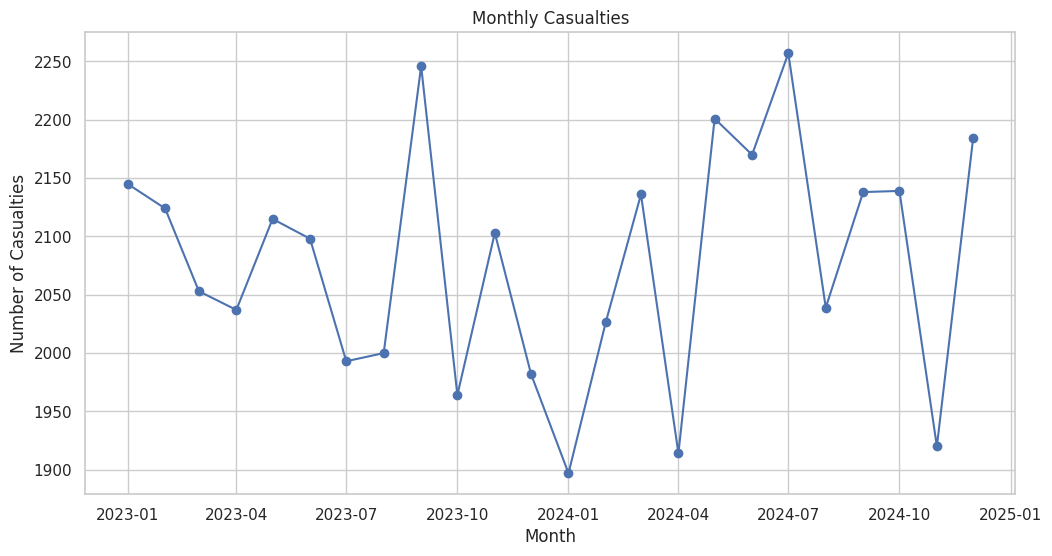

In [ ]:
plot_series([monthly_counts['YearMonth']], [monthly_counts['Casualties']], 'Monthly Casualties', 'Month', 'Number of Casualties', labels=['Monthly Data'], linestyles=['-'])

In [ ]:
# Create lag features (previous 3 months)
for lag in range(1, 4):
    monthly_counts[f'lag_{lag}'] = monthly_counts['Casualties'].shift(lag)

# Drop rows with NaN values created by shifting
monthly_counts = monthly_counts.dropna().reset_index(drop=True)

In [ ]:
monthly_counts.head()

,YearMonth,Casualties,lag_1,lag_2,lag_3
0,2023-04-01,2037,2053.0,2124.0,2145.0
1,2023-05-01,2115,2037.0,2053.0,2124.0
2,2023-06-01,2098,2115.0,2037.0,2053.0
3,2023-07-01,1993,2098.0,2115.0,2037.0
4,2023-08-01,2000,1993.0,2098.0,2115.0


In [ ]:
# Features = lag_1, lag_2, lag_3
X = monthly_counts[['lag_1', 'lag_2', 'lag_3']]
y = monthly_counts['Casualties']

In [ ]:
split_index = int(len(monthly_counts) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [ ]:
model = xgb.XGBRegressor(
                          n_estimators=200,
                          learning_rate=0.01,
                          max_depth=1,
                          random_state=42
                        )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 116.15


In [ ]:
# Save the trained model
joblib.dump(model, 'xgboost_casualties_forecasting_model.pkl')

['xgboost_casualties_forecasting_model.pkl']

In [ ]:
# Save Column order used in training
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'xgboost_casualties_forecasting_feature_columns.pkl')

['xgboost_casualties_forecasting_feature_columns.pkl']

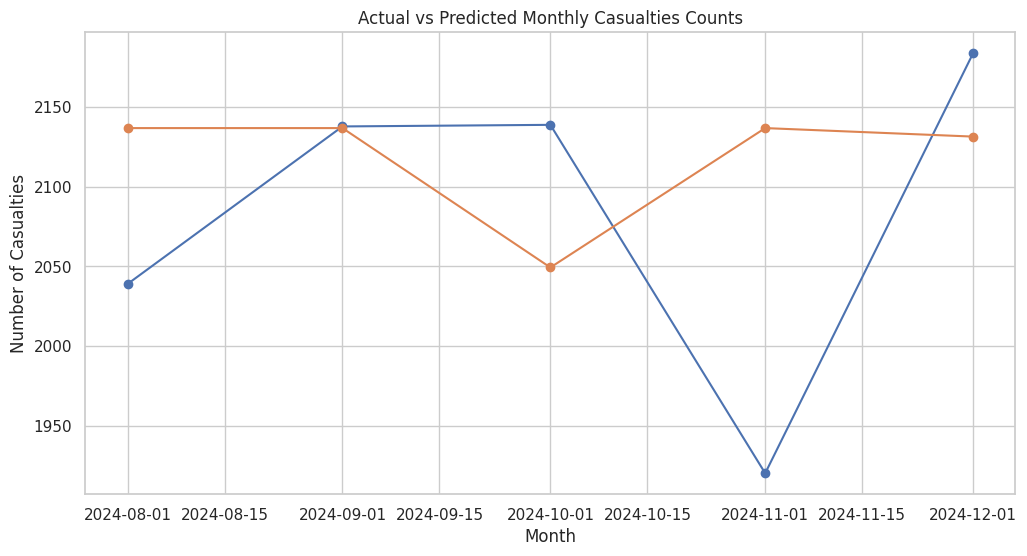

In [ ]:
plot_series([monthly_counts['YearMonth'].iloc[split_index:], monthly_counts['YearMonth'].iloc[split_index:]],
            [y_test, y_pred],
            'Actual vs Predicted Monthly Casualties Counts',
            'Month',
            'Number of Casualties',
            labels= ['Actual', 'Predicted'],
            linestyles= ['-', '-'])

In [ ]:
n_forecast = 6                  # forecast next 6 months
last_known = monthly_counts[['Casualties']].tail(3)['Casualties'].values.tolist()
future_dates, future_predictions= forecast_interval(monthly_counts, n_forecast, last_known)

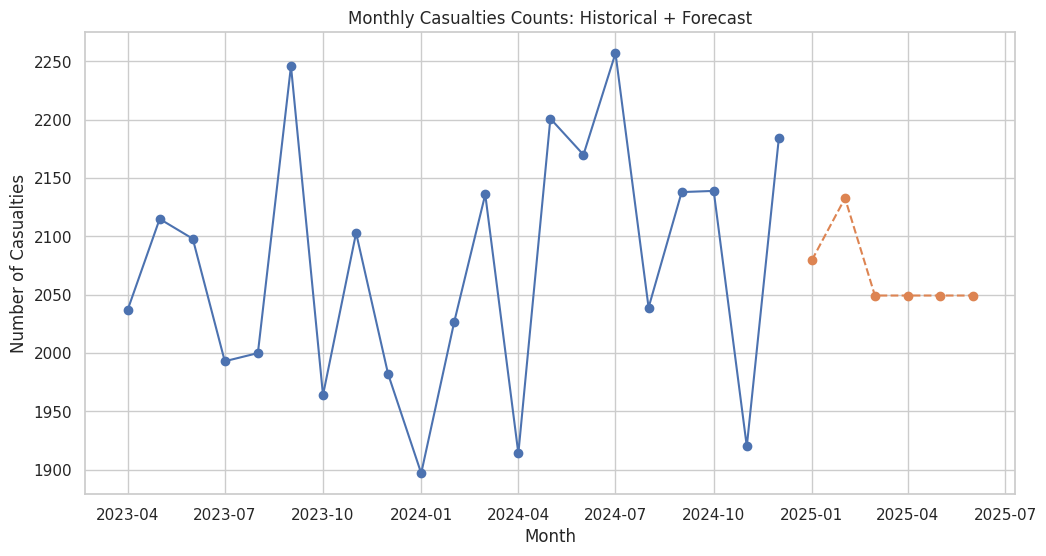

In [ ]:
plot_series([monthly_counts['YearMonth'], future_dates],
            [monthly_counts['Casualties'], future_predictions],
            'Monthly Casualties Counts: Historical + Forecast',
            'Month',
            'Number of Casualties',
            labels= ['Historical', 'Forecast'],
            linestyles= ['-', '--'])

#### **3- Forecast Accidents Count (Monthly Interval)**

In [ ]:
#
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'])
accidents_df['YearMonth'] = accidents_df['Date'].dt.to_period('M')

# Group by YearMonth and count accidents (Accident ID count or rows count)
monthly_counts = accidents_df.groupby('YearMonth').size().reset_index(name='AccidentsCount')

# Convert YearMonth back to datetime for plotting
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.to_timestamp()

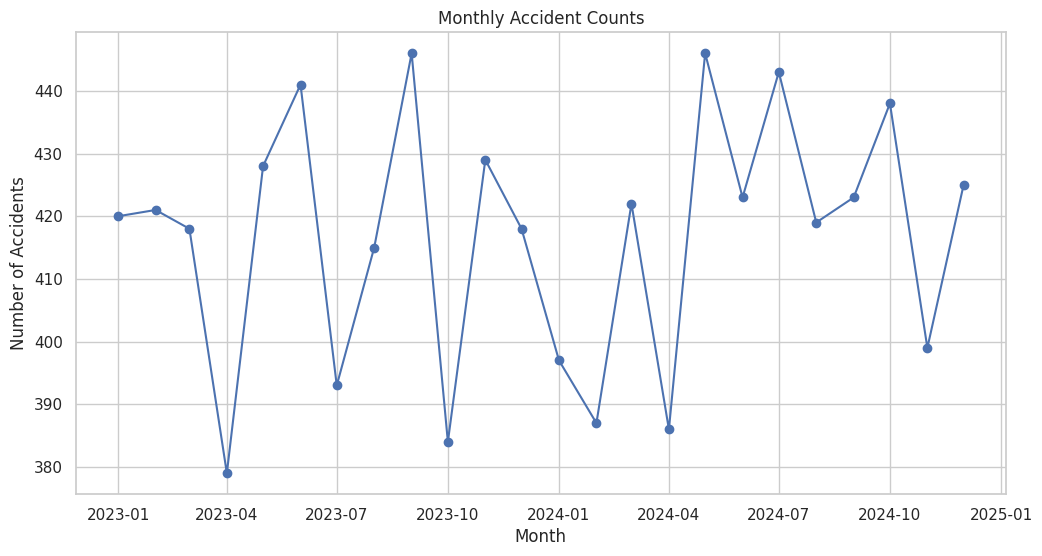

In [ ]:
plot_series([monthly_counts['YearMonth']], [monthly_counts['AccidentsCount']], 'Monthly Accident Counts', 'Month', 'Number of Accidents', labels=['Monthly Data'], linestyles= ['-'])

In [ ]:
# Create lag features (previous 3 months)
for lag in range(1, 4):
    monthly_counts[f'lag_{lag}'] = monthly_counts['AccidentsCount'].shift(lag)

# Drop rows with NaN values created by shifting
monthly_counts = monthly_counts.dropna().reset_index(drop=True)

In [ ]:
monthly_counts.head()

,YearMonth,AccidentsCount,lag_1,lag_2,lag_3
0,2023-04-01,379,418.0,421.0,420.0
1,2023-05-01,428,379.0,418.0,421.0
2,2023-06-01,441,428.0,379.0,418.0
3,2023-07-01,393,441.0,428.0,379.0
4,2023-08-01,415,393.0,441.0,428.0


In [ ]:
# Features = lag_1, lag_2, lag_3
X = monthly_counts[['lag_1', 'lag_2', 'lag_3']]
y = monthly_counts['AccidentsCount']

In [ ]:
split_index = int(len(monthly_counts) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [ ]:
model = xgb.XGBRegressor(
                          n_estimators=100,
                          learning_rate=0.001,
                          max_depth=3,
                          random_state=42
                        )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 14.65


In [ ]:
# Save the trained model
joblib.dump(model, 'xgboost_accidents_forecasting_model.pkl')

['xgboost_accidentss_forecasting_model.pkl']

In [ ]:
# Save Column order used in training
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, 'xgboost_accidents_forecasting_feature_columns.pkl')

['xgboost_accidents_forecasting_feature_columns.pkl']

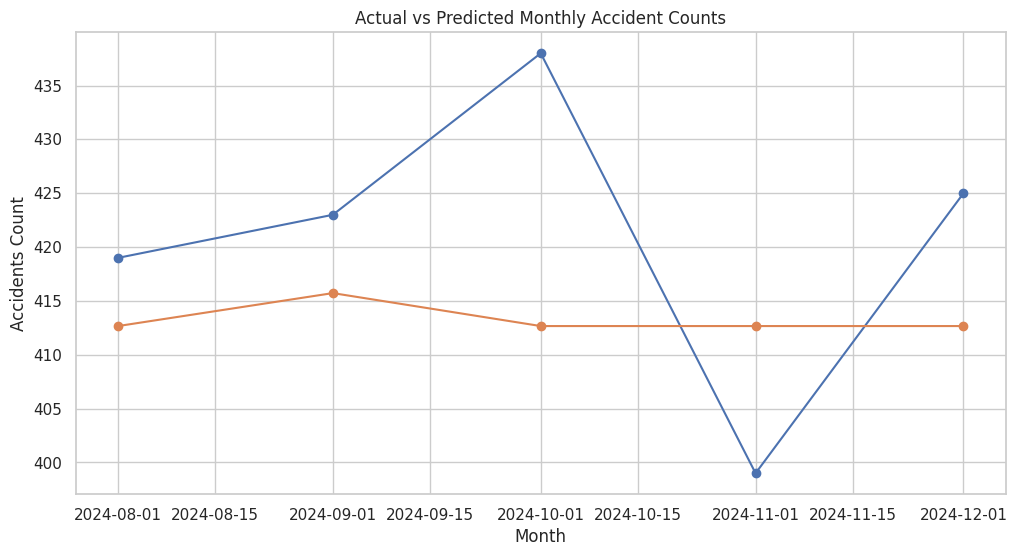

In [ ]:
plot_series([monthly_counts['YearMonth'].iloc[split_index:], monthly_counts['YearMonth'].iloc[split_index:]],
            [y_test, y_pred],
            'Actual vs Predicted Monthly Accident Counts',
            'Month',
            'Accidents Count',
            labels= ['Actual', 'Predicted'],
            linestyles= ['-', '-'])

In [ ]:
n_forecast = 6  # forecast next 6 months
last_known = monthly_counts[['AccidentsCount']].tail(3)['AccidentsCount'].values.tolist()
future_dates, future_predictions= forecast_interval(monthly_counts, n_forecast, last_known)

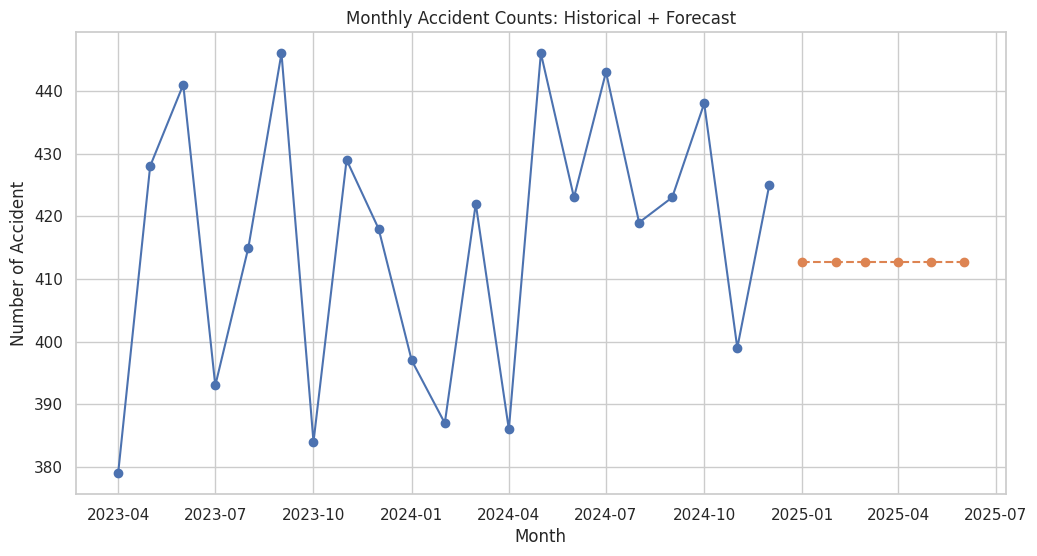

In [ ]:
plot_series([monthly_counts['YearMonth'], future_dates],
            [monthly_counts['AccidentsCount'], future_predictions],
            'Monthly Accident Counts: Historical + Forecast',
            'Month',
            'Number of Accident',
            labels= ['Historical', 'Forecast'],
            linestyles= ['-', '--'])